## Build an image classifier with nothing but keywords

This is a fun little notebook that uses the [google-images-download](https://github.com/hardikvasa/google-images-download) python tool and the [fast.ai](https://github.com/fastai/fastai) pytorch library to create image classifiers by just using keywords. In this case we'll add Corn Dogs to the famous [Hot-Dog-Or-No-Hot-Dog Classifier](https://www.youtube.com/watch?v=ACmydtFDTGs). We'll do that by just specifying the classes 'Hot Dog' and 'Corn Dog', automatically download as much pictures as you want per class from google and fine tune the softmax layer of a ResNet34 model trained on ImageNet.

## Prerequesites

### Make sure you have pytorch and the fast.ai library installed and import the following:

In [19]:
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

### Install the downloadtool and the dependencies

Here we'll install the tools needed to download pictures from google. You might have to add sudo rights to some commands (I'm inside a container and root). First the Python download tool:

In [16]:
#!pip install google_images_download

And now chrome browser and chromedriver. You don't need that if you want max 100 pictures per class.

In [17]:
#!wget https://chromedriver.storage.googleapis.com/2.35/chromedriver_linux64.zip
#!unzip chromedriver_linux64.zip
#!mv chromedriver /usr/bin/chromedriver
#!chown root:root /usr/bin/chromedriver
#!chmod +x /usr/bin/chromedriver

In [18]:
#!curl -sS -o - https://dl-ssl.google.com/linux/linux_signing_key.pub | apt-key add
#!echo "deb [arch=amd64]  http://dl.google.com/linux/chrome/deb/ stable main" >> /etc/apt/sources.list.d/google-chrome.list
#!apt-get -y update
#!apt-get -y install google-chrome-stable

## Get the pics with keywords

import the tool

In [20]:
from google_images_download import google_images_download

Set Path, image size and number of images to be downloaded

In [22]:
PATH = "/fastai/data/HotCornDogs/"
sz=224
nof_pics = 200

First we'll instantiate the downloader class. The dictionary `arguments` holds our classes as keywords, the number of files we want per class and the directory where the pics should be saved. If you want to download more than 100 images per class you have to install chrome. Adapt that to your needs!

In [23]:
response = google_images_download.googleimagesdownload()

arguments = {"keywords":"Hot Dog,Corn Dog",
             "limit":nof_pics,
             "print_urls":False,
             "output_directory":f'{PATH}train',
             "chromedriver":"/usr/bin/chromedriver"}

paths = response.download(arguments)



Item no.: 1 --> Item name = Hot Dog
Evaluating...
Getting you a lot of images. This may take a few moments...
Reached end of Page.
Starting Download...
Completed Image ====> 1. retrieve.cfm
Completed Image ====> 2. 769071-960x720-hot-dog.jpg
Completed Image ====> 3. hot-dog-06.jpg
Completed Image ====> 4. mcdonalds-hot-dog-220027-detailp.jpeg
Completed Image ====> 5. 13521_1-1_334-334@2x.jpg
Completed Image ====> 6. maxresdefault.jpg
Completed Image ====> 7. italian-style-hotdog-adventskalender-wurstler.jpg
Completed Image ====> 8. 1200px-germanvegetariansausage.jpg
Completed Image ====> 9. hotdog_mit_bacon.jpg
Completed Image ====> 10. ,id=137ca8c8,b=lecker,w=610,cg=c.jpg
Completed Image ====> 11. italienischer-hot-dog-mit-salsiccia_.jpg
Completed Image ====> 12. 943911-960x720-cheeseburger-hot-dog.jpg
Completed Image ====> 13. f214_foodboom_laugen%20hot%20dog%20mit%20senfcreme_klein_v1.jpg
Completed Image ====> 14. basic-hot-dogs.jpg
Completed Image ====> 15. hot-dog-race-cars-9724-

Completed Image ====> 130. hot_dogs_-_su09-414916a5878f31a7b1ea3f319d81ac8f.jpg
Completed Image ====> 131. istock_000042054604_small.jpg
Completed Image ====> 132. 2208643_boeklunder-hot-dog-wuerstchen_xxl.jpg
Completed Image ====> 133. pizza-hotdog.png
Completed Image ====> 134. kartoffel-hotdog-47debf5b8ee26.jpg
Completed Image ====> 135. hot%20dog-sauce.jpg
Completed Image ====> 136. 80302820.jpg
Completed Image ====> 137. ikea-verkauft-bald-veggie-hot-dogs.jpg
Completed Image ====> 138. 902adb4e8050bd23c493de3541be6536.jpg
Completed Image ====> 139. hobelz-vegane-hot-dogs-chili_600x600.jpg
Completed Image ====> 140. hot-dog-gurken.jpg
Completed Image ====> 141. 714oteg9hpl._sx355_.jpg
Completed Image ====> 142. ?media_id=168684023145159.jpg
Completed Image ====> 143. hot-dog-zum-k%c3%a4se-schmelzen-auf-dem-grill.jpg
Completed Image ====> 144. veggie-corn-dogs.jpg
Completed Image ====> 145. winter-lustige-hot-dog-hundebett-haustier-katze-sofa-weiche-warme-baumwolle-katze-schl-ft-zim

Completed Image ====> 56. 50-cent-corn-dogs-at-sonic-on-april-19-2018-678x381.jpg
Completed Image ====> 57. 20170208165442-f002f20b.jpg
Completed Image ====> 58. gluten-free-corn-dog-bites-2.jpg
Completed Image ====> 59. corndogs-1-e1498268243185.jpg
Completed Image ====> 60. paleo_corndog_square.jpg
Completed Image ====> 61. a67e4c3d-cdbc-450c-9bac-84c6dc03438f.jpg
Completed Image ====> 62. default-img-57404.jpg
Completed Image ====> 63. time-to-skip-the-store-bought-snacks-in-favor-of-an-easy-batter-recipe-for-homemade-corn-dogs-that-take-just-minutes-to-make-your-kids-will-thank-you.jpg
Completed Image ====> 64. 191214_640x428.jpg
Completed Image ====> 65. corn-dogs-featured.jpg
Completed Image ====> 66. amerikanische-corn-dogs.jpg
Completed Image ====> 67. img-foot_long_corn_dog.jpg
Completed Image ====> 68. 1457982479317.jpeg
Completed Image ====> 69. 20110823-166863-gftues-corndogs.jpg
Completed Image ====> 70. joshnas_corn_dogs.jpg
Completed Image ====> 71. pxqrocxwsjcc_3bobqocn

Completed Image ====> 194. 852_grande.jpeg
Completed Image ====> 195. corn-dog-batter-recipe1.jpg
Completed Image ====> 196. mld105742_0710_corndogs2_vert.jpg
Completed Image ====> 197. 0s9a0665-1350x2024.jpg
Completed Image ====> 198. homemade-corn-dogs6-682x1024.jpg
Completed Image ====> 199. 1469169524915.jpeg
Completed Image ====> 200. fr_minicorndogslg.jpg

Errors: 3



## Extract validation set

Now we need a little function to extract a validation set:

In [24]:
def make_val_set(PATH, nof_val_pics):
    if not os.path.exists(f'{PATH}valid'):
        os.makedirs(f'{PATH}valid')
        for pic_class in os.listdir(f'{PATH}train'):
            os.makedirs(f'{PATH}valid/{pic_class}')
            for pic in random.sample(os.listdir(f'{PATH}train/{pic_class}'), nof_val_pics):
                os.rename(f'{PATH}train/{pic_class}/{pic}', 
                          f'{PATH}valid/{pic_class}/{pic}')
    else:
        warnings.warn("The validation folder already exists! No validation set created.")

Create the validation set:

In [25]:
make_val_set(PATH, 40)

## Train the model

In [36]:
arch=resnet34
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(0.01, 2)

epoch      trn_loss   val_loss   accuracy        
    0      0.740858   0.547829   0.725     
    1      0.567346   0.430892   0.825           



[array([0.43089]), 0.825]

## Plot some pics

In [28]:
# this gives prediction for validation set. Predictions are in log scale
log_preds = learn.predict()
log_preds.shape
preds = np.argmax(log_preds, axis=1)  # from log probabilities to 0 or 1
probs = np.exp(log_preds[:,1])        # pr(dog)

In [29]:
def rand_by_mask(mask): return np.random.choice(np.where(mask)[0], 4, replace=False)
def rand_by_correct(is_correct): return rand_by_mask((preds == data.val_y)==is_correct)

In [30]:
def plot_val_with_title(idxs, title):
    imgs = np.stack([data.val_ds[x][0] for x in idxs])
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(data.val_ds.denorm(imgs), rows=1, titles=title_probs)

In [31]:
def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])

In [32]:
def load_img_id(ds, idx): return np.array(PIL.Image.open(PATH+ds.fnames[idx]))

def plot_val_with_title(idxs, title):
    imgs = [load_img_id(data.val_ds,x) for x in idxs]
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(imgs, rows=1, titles=title_probs, figsize=(16,8))

In [33]:
def most_by_mask(mask, mult):
    idxs = np.where(mask)[0]
    return idxs[np.argsort(mult * probs[idxs])[:4]]

def most_by_correct(y, is_correct): 
    mult = -1 if (y==1)==is_correct else 1
    return most_by_mask(((preds == data.val_y)==is_correct) & (data.val_y == y), mult)

Most correct Corn Dogs


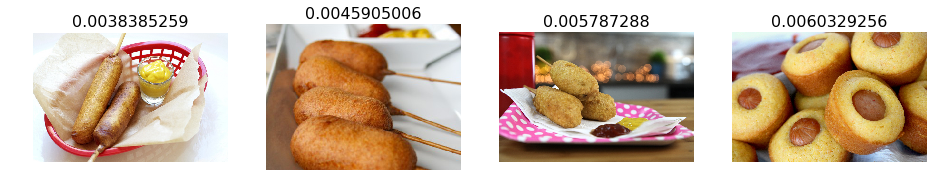

In [37]:
plot_val_with_title(most_by_correct(0, True), "Most correct Corn Dogs")

Most correct Hot Dogs


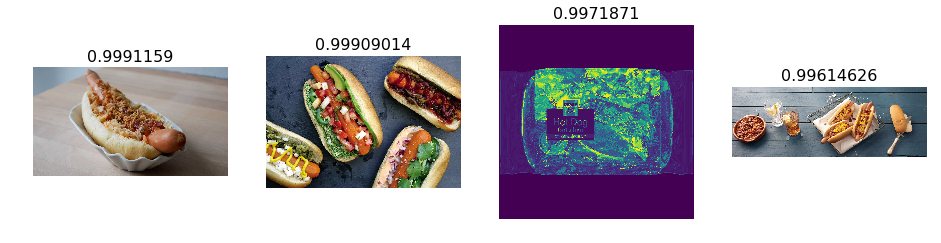

In [38]:
plot_val_with_title(most_by_correct(1, True), "Most correct Hot Dogs")